In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from import_me import *

In [2]:
with open(r"../Simulação BPSK/Transmissão RedDot Usando ConstellationMod/penguin.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [3]:
orig

array([ 66,  77, 138, ..., 206, 139,  82], dtype=uint8)

In [4]:
header = orig[:122]
#preamble = np.unpackbits(preamble)

In [5]:
450 * 600 * 3 + 122

810122

In [6]:
with open("output.data", "rb")as f:
    _ = f.read()
    
rcv = np.frombuffer(_, dtype = np.uint8)

In [7]:
for i in range(8):
    _ = np.packbits(np.roll(np.unpackbits(rcv), i))
    print(f"{i} =", _[:8])

0 = [253 141  36  63 252 221 164  63]
1 = [254 198 146  31 254 110 210  31]
2 = [255  99  73  15 255  55 105  15]
3 = [255 177 164 135 255 155 180 135]
4 = [255 216 210  67 255 205 218  67]
5 = [255 236 105  33 255 230 237  33]
6 = [255 246  52 144 255 243 118 144]
7 = [127 251  26  72 127 249 187  72]


### <font color = green> Escolher shift que tenha 67, 255

In [8]:
rcv = np.packbits(np.roll(np.unpackbits(rcv), 4))

In [9]:
rcv[:8]

array([255, 216, 210,  67, 255, 205, 218,  67], dtype=uint8)

### <font color = green>  Deixar 67, 255 nas duas primeiras posições

In [10]:
rcv = np.roll(rcv, 1)
rcv

array([ 67, 255, 216, ..., 255, 211, 206], dtype=uint8)

In [11]:
rcv = np.array([x for i, x in enumerate(rcv) if i % 4 >= 2])

In [12]:
rcv[:100]

array([216, 210, 205, 218, 209, 205, 218, 209, 205, 218, 209, 205, 216,
       207, 203, 215, 206, 202, 212, 203, 199, 210, 201, 197, 208, 199,
       195, 206, 197, 193, 205, 198, 193, 204, 198, 193, 207, 201, 196,
       210, 204, 199, 211, 205, 200, 216, 210, 205, 217, 211, 206, 217,
       211, 206, 219, 213, 208, 220, 214, 209, 219, 213, 208, 219, 213,
       208, 219, 213, 208, 219, 213, 208, 207, 213, 208, 217, 211, 206,
       217, 211, 206, 217, 211, 206, 217, 211, 206, 218, 211, 204, 225,
       216, 207, 220, 213, 204, 221, 213, 206, 219], dtype=uint8)

In [13]:
%%time
corr = np.correlate(np.unpackbits(rcv), np.unpackbits(header))

CPU times: user 19.3 s, sys: 8.17 ms, total: 19.3 s
Wall time: 19.3 s


In [14]:
pos = np.argwhere(corr == max(corr)).ravel()

In [15]:
pos

array([4860768])

In [16]:
rcv_array = np.packbits(np.roll(np.unpackbits(rcv), -pos[0]))

In [17]:
rcv_array[:8]

array([ 66,  77, 138,  92,  12,   0,   0,   0], dtype=uint8)

In [18]:
rcv = rcvArray2BMP(rcv_array, shape = (450, 600, 3))

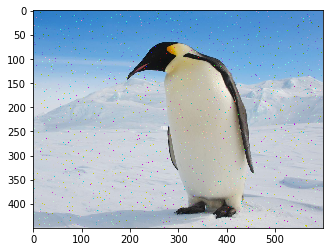

In [19]:
plt.imshow(rcv)

In [20]:
rcv = rcv.ravel()

In [21]:
orig = rcvArray2BMP(orig, shape = (450, 600, 3)).ravel()

In [22]:
rcv_bit = np.unpackbits(rcv)

In [23]:
orig_bit = np.unpackbits(orig)

In [24]:
ber = 1 - np.mean(np.equal(rcv_bit, orig_bit))

In [25]:
ber

0.006187345679012357